In [1]:
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger
import time
import os
import numpy as np
from keras.layers import Dense, Flatten, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
from keras.optimizers import Adam
import sys

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [2]:
X = np.load('X_data.npy')
y = np.load('y_data.npy')

In [3]:
X[0].shape

(7, 1, 2048)

In [4]:
y[0].shape

(4,)

In [5]:
X = np.squeeze(X)
y = np.squeeze(y)


X.shape

(552, 7, 2048)

In [6]:
model = Sequential()
model.add(LSTM(2048, return_sequences=False,input_shape=X[0].shape,dropout=0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(y[0]), activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
early_stopper = EarlyStopping(patience=20)

In [8]:
adam_optimizer = Adam(lr=1e-5, decay=1e-6)

model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy']) 

In [9]:
history = model.fit(X,y,batch_size=32,validation_split=0.01,verbose=1,callbacks=[early_stopper],epochs=1000)

Instructions for updating:
Use tf.cast instead.
Train on 546 samples, validate on 6 samples
Epoch 1/1000
546/546 [==============================] - 6s 10ms/step - loss: 1.3958 - acc: 0.2985 - val_loss: 0.8342 - val_acc: 1.0000
Epoch 2/1000
546/546 [==============================] - 2s 3ms/step - loss: 1.2718 - acc: 0.4304 - val_loss: 0.7774 - val_acc: 1.0000
Epoch 3/1000
546/546 [==============================] - 2s 3ms/step - loss: 1.1658 - acc: 0.5128 - val_loss: 0.8802 - val_acc: 1.0000
Epoch 4/1000
546/546 [==============================] - 2s 3ms/step - loss: 1.1259 - acc: 0.5531 - val_loss: 0.7532 - val_acc: 1.0000
Epoch 5/1000
546/546 [==============================] - 2s 3ms/step - loss: 1.0386 - acc: 0.6062 - val_loss: 0.6978 - val_acc: 1.0000
Epoch 6/1000
546/546 [==============================] - 2s 3ms/step - loss: 0.9637 - acc: 0.6520 - val_loss: 0.6568 - val_acc: 1.0000
Epoch 7/1000
546/546 [==============================] - 2s 3ms/step - loss: 0.9093 - acc: 0.6905 - val_

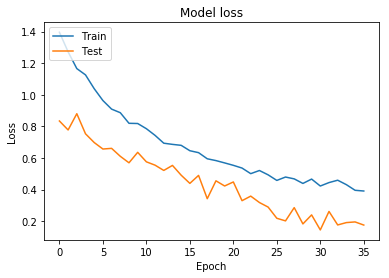

In [12]:
import matplotlib.pyplot as plt



# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

%matplotlib inline
